In [1]:
import cv2
import os
import pandas as pd
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from skimage.transform import radon

# Radon transform

In [10]:
# Carpeta de imágenes
folder = "Data/PetroImages_v2"
radon_features = []
radon_filenames = []

for file in os.listdir(folder):
    path = os.path.join(folder, file)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (128, 128))
    theta = np.linspace(0., 180., max(img_resized.shape), endpoint=False)
    radon_img = radon(img_resized, theta=theta, circle=True)
    radon_vector = radon_img.mean(axis=0)
    radon_features.append(radon_vector)
    radon_filenames.append(file)

# Crear nombres de columnas con prefijo "Rad"
radon_colnames = [f"Rad{i}" for i in range(len(radon_features[0]))]
df_radon = pd.DataFrame(radon_features, columns=radon_colnames)
df_radon.insert(0, 'filename', radon_filenames)
print(df_radon.shape)

(1735, 129)


In [11]:
print(df_radon.head())

           filename       Rad0       Rad1       Rad2       Rad3       Rad4  \
0  A1Z01F01_000.png  12.985907  12.985908  12.985908  12.985880  12.985956   
1  A1Z01F02_000.png  22.568536  22.568537  22.568546  22.568546  22.568505   
2  A1Z01F03_000.png  19.538817  19.538817  19.538816  19.538835  19.538789   
3  A1Z01F04_000.png  23.987071  23.987073  23.987082  23.987079  23.987150   
4  A1Z01F05_000.png  22.610600  22.610601  22.610590  22.610593  22.610665   

        Rad5       Rad6       Rad7       Rad8  ...     Rad118     Rad119  \
0  12.985890  12.985861  12.985859  12.985980  ...  12.986313  12.985199   
1  22.568436  22.568560  22.568467  22.568422  ...  22.568497  22.568584   
2  19.538839  19.538751  19.538798  19.538678  ...  19.538927  19.539206   
3  23.986967  23.987052  23.986750  23.987527  ...  23.987088  23.986913   
4  22.610551  22.610672  22.610805  22.610897  ...  22.610559  22.610685   

      Rad120     Rad121     Rad122     Rad123     Rad124     Rad125  \
0  

In [12]:
df_radon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Columns: 129 entries, filename to Rad127
dtypes: float64(128), object(1)
memory usage: 1.7+ MB


In [13]:
df_radon.describe()

,Rad0,Rad1,Rad2,Rad3,Rad4,Rad5,Rad6,Rad7,Rad8,Rad9,...,Rad118,Rad119,Rad120,Rad121,Rad122,Rad123,Rad124,Rad125,Rad126,Rad127
count,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,...,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000
mean,7.965954,7.965954,7.965957,7.965959,7.965962,7.965936,7.965955,7.965935,7.965996,7.965953,...,7.966009,7.965947,7.965997,7.965928,7.965947,7.965944,7.965964,7.965958,7.965957,7.965954
std,5.555106,5.555106,5.555108,5.555109,5.555112,5.555103,5.555104,5.555100,5.555158,5.555132,...,5.555157,5.555114,5.555151,5.555110,5.555112,5.555104,5.555115,5.555107,5.555108,5.555106
min,0.369884,0.369883,0.369879,0.369876,0.369883,0.369852,0.370031,0.369906,0.369788,0.369965,...,0.370540,0.369683,0.369914,0.369801,0.369672,0.369970,0.369862,0.369873,0.369881,0.369883
25%,3.866100,3.866101,3.866111,3.866118,3.866101,3.866055,3.866201,3.865961,3.866603,3.866628,...,3.866416,3.866070,3.866309,3.866161,3.866183,3.866222,3.866228,3.866121,3.866107,3.866102
50%,6.647365,6.647367,6.647381,6.647371,6.647394,6.647392,6.647302,6.647393,6.646981,6.647558,...,6.648118,6.648205,6.647193,6.647107,6.647416,6.647437,6.647348,6.647376,6.647364,6.647369
75%,10.512806,10.512805,10.512798,10.512802,10.512800,10.512845,10.512855,10.512992,10.512928,10.512897,...,10.512624,10.512501,10.513004,10.512880,10.512715,10.512793,10.512821,10.512794,10.512799,10.512805
max,41.928033,41.928027,41.928026,41.928003,41.928223,41.927855,41.928012,41.927825,41.928235,41.927048,...,41.926564,41.925648,41.928274,41.927722,41.927818,41.927834,41.928077,41.927987,41.928023,41.928025


## Normalización

In [14]:
df_radon.to_csv('df_radon.csv', index=False)

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar solo las columnas numéricas (sin la columna 'filename')
radon_columns = [col for col in df_radon.columns if col.startswith('Rad')]
scaler = MinMaxScaler()
df_radon[radon_columns] = scaler.fit_transform(df_radon[radon_columns])

print(df_radon.head())

           filename      Rad0      Rad1      Rad2      Rad3      Rad4  \
0  A1Z01F01_000.png  0.303575  0.303575  0.303575  0.303575  0.303575   
1  A1Z01F02_000.png  0.534159  0.534159  0.534159  0.534160  0.534156   
2  A1Z01F03_000.png  0.461256  0.461256  0.461256  0.461257  0.461253   
3  A1Z01F04_000.png  0.568293  0.568293  0.568293  0.568293  0.568292   
4  A1Z01F05_000.png  0.535171  0.535171  0.535171  0.535171  0.535170   

       Rad5      Rad6      Rad7      Rad8  ...    Rad118    Rad119    Rad120  \
0  0.303577  0.303572  0.303575  0.303577  ...  0.303585  0.303579  0.303574   
1  0.534159  0.534158  0.534160  0.534155  ...  0.534169  0.534193  0.534151   
2  0.461259  0.461252  0.461257  0.461251  ...  0.461266  0.461294  0.461249   
3  0.568293  0.568291  0.568287  0.568302  ...  0.568306  0.568323  0.568289   
4  0.535172  0.535171  0.535178  0.535177  ...  0.535182  0.535206  0.535176   

     Rad121    Rad122    Rad123    Rad124    Rad125    Rad126    Rad127  
0  0.3

In [16]:
df_radon.describe()

,Rad0,Rad1,Rad2,Rad3,Rad4,Rad5,Rad6,Rad7,Rad8,Rad9,...,Rad118,Rad119,Rad120,Rad121,Rad122,Rad123,Rad124,Rad125,Rad126,Rad127
count,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,...,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000
mean,0.182782,0.182782,0.182782,0.182782,0.182781,0.182783,0.182779,0.182782,0.182784,0.182784,...,0.182777,0.182796,0.182781,0.182784,0.182787,0.182781,0.182782,0.182782,0.182782,0.182782
std,0.133671,0.133671,0.133671,0.133671,0.133670,0.133671,0.133671,0.133671,0.133671,0.133675,...,0.133679,0.133678,0.133671,0.133672,0.133671,0.133672,0.133671,0.133671,0.133671,0.133671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.084128,0.084128,0.084129,0.084129,0.084128,0.084128,0.084128,0.084125,0.084142,0.084141,...,0.084124,0.084137,0.084132,0.084132,0.084135,0.084130,0.084132,0.084129,0.084129,0.084128
50%,0.151053,0.151053,0.151053,0.151053,0.151053,0.151055,0.151049,0.151054,0.151045,0.151060,...,0.151063,0.151086,0.151047,0.151050,0.151059,0.151054,0.151053,0.151054,0.151053,0.151053
75%,0.244066,0.244066,0.244066,0.244066,0.244065,0.244068,0.244064,0.244071,0.244069,0.244072,...,0.244058,0.244076,0.244069,0.244071,0.244069,0.244065,0.244066,0.244066,0.244066,0.244066
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Kmeans

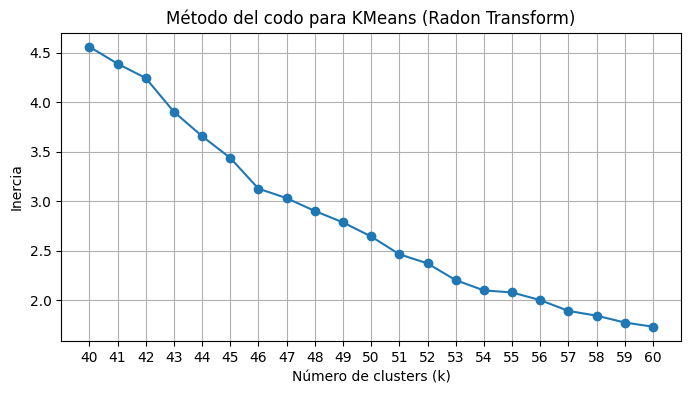

In [26]:
inertia = []
k_range = range(40, 61)
for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(df_radon[radon_columns])
    inertia.append(kmeans_test.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para KMeans (Radon Transform)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [30]:
best_silhouette = -1
best_db = float('inf')
best_labels = None
best_params = {}

X = df_radon[radon_columns]
results = []

for n_clusters in range(4, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    db_index = davies_bouldin_score(X, labels)
    results.append({
        'n_clusters': n_clusters,
        'silhouette': silhouette,
        'davies_bouldin': db_index,
        'labels': labels
    })
    if silhouette > best_silhouette or (silhouette == best_silhouette and db_index < best_db):
        best_silhouette = silhouette
        best_db = db_index
        best_labels = labels
        best_params = {'n_clusters': n_clusters}

print(f"Mejor Silhouette: {best_silhouette:.4f}, Mejor Davies-Bouldin: {best_db:.4f}, Parámetros: {best_params}")

# Guardar el mejor clustering en el DataFrame
df_radon['kmeans_best'] = best_labels

Mejor Silhouette: 0.5583, Mejor Davies-Bouldin: 0.4995, Parámetros: {'n_clusters': 6}


In [ ]:


# Probar KMeans con diferentes números de clusters
best_silhouette = -1
best_db = float('inf')
best_labels = None
best_params = {}

for n_clusters in range(3, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_radon)
    silhouette = silhouette_score(X_radon, labels)
    db_index = davies_bouldin_score(X_radon, labels)
    if silhouette > best_silhouette or (silhouette == best_silhouette and db_index < best_db):
        best_silhouette = silhouette
        best_db = db_index
        best_labels = labels
        best_params = {'n_clusters': n_clusters}

print(f"Mejor Silhouette: {best_silhouette:.4f}, Mejor Davies-Bouldin: {best_db:.4f}, Parámetros: {best_params}")

# Guardar el mejor clustering en el DataFrame
df_radon['kmeans_radon'] = best_labels

# Visualización con PCA
pca_radon = PCA(n_components=2)
X_radon_vis = pca_radon.fit_transform(X_radon)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_radon_vis[:, 0], X_radon_vis[:, 1], c=df_radon['kmeans_radon'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters KMeans sobre descriptores Radon (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [31]:
# Imprimir el número de cluster y la cantidad de imágenes asociadas a cada cluster de kmeans_best
cluster_counts = df_radon['kmeans_best'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} imágenes")

Cluster 0: 537 imágenes
Cluster 1: 193 imágenes
Cluster 2: 502 imágenes
Cluster 3: 391 imágenes
Cluster 4: 94 imágenes
Cluster 5: 18 imágenes


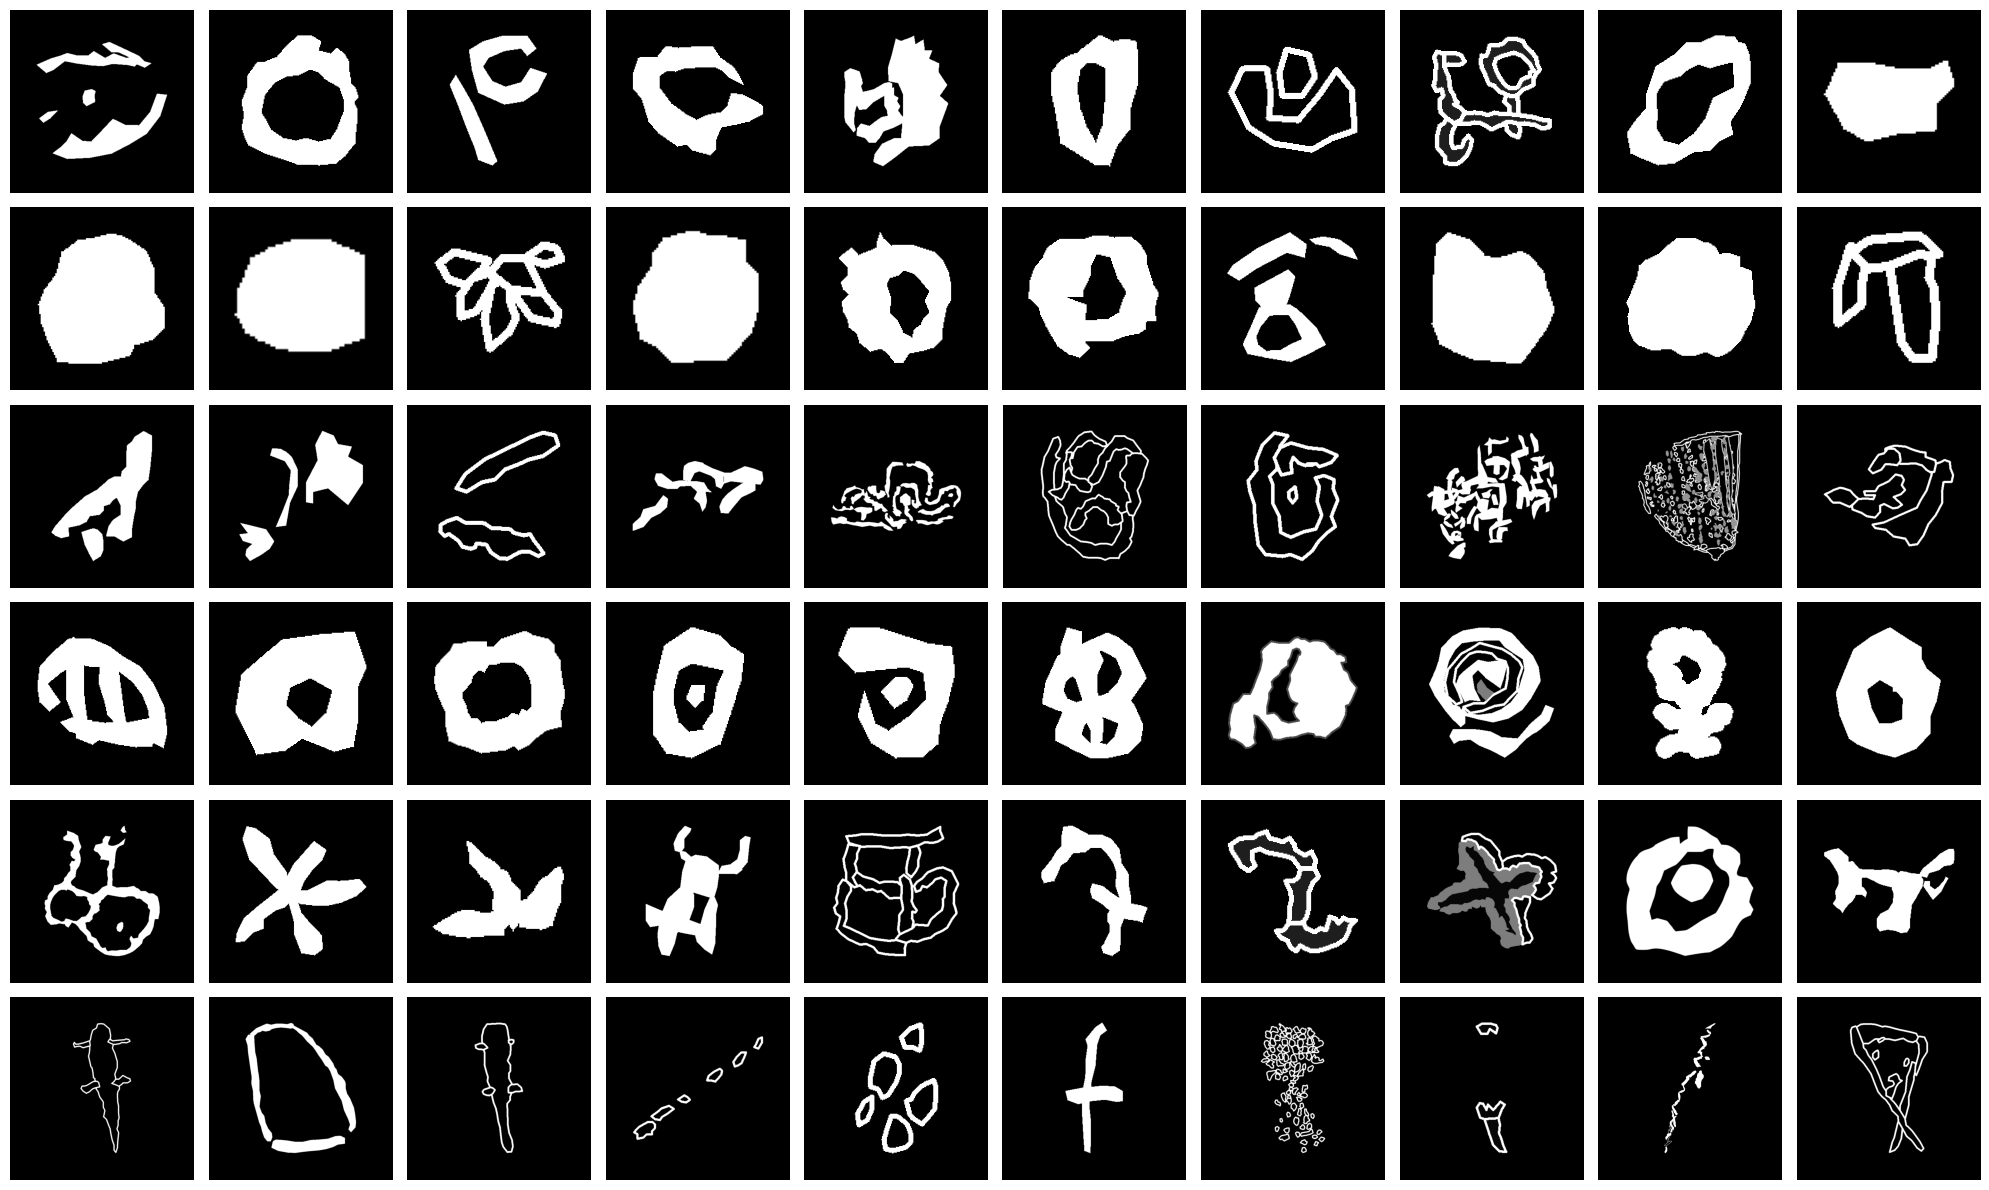

In [33]:
import random
from PIL import Image

num_imgs = 10
clusters_kmeans = df_radon['kmeans_best'].unique()
fig, axes = plt.subplots(len(clusters_kmeans), num_imgs, figsize=(num_imgs*2, len(clusters_kmeans)*2))

for idx, cluster_id in enumerate(clusters_kmeans):
    # Filtra las imágenes del cluster actual
    cluster_imgs = df_radon[df_radon['kmeans_best'] == cluster_id]['filename'].tolist()
    # Selecciona aleatoriamente hasta num_imgs imágenes
    selected_imgs = random.sample(cluster_imgs, min(num_imgs, len(cluster_imgs)))
    for j, fname in enumerate(selected_imgs):
        img_path = os.path.join(folder, fname)
        img = Image.open(img_path)
        ax = axes[idx, j] if len(clusters_kmeans) > 1 else axes[j]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        if j == 0:
            ax.set_ylabel(f'Cluster {cluster_id}', fontsize=12)
    # Si hay menos de num_imgs imágenes, oculta los ejes restantes
    for j in range(len(selected_imgs), num_imgs):
        ax = axes[idx, j] if len(clusters_kmeans) > 1 else axes[j]
        ax.axis('off')

plt.tight_layout()
plt.show()

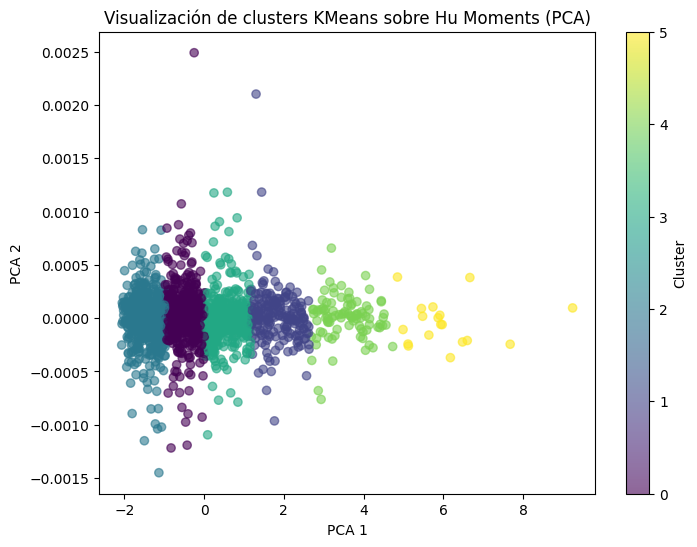

In [34]:
# Reducir la dimensionalidad de los datos normalizados para visualización usando PCA
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(df_radon[radon_columns])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=df_radon['kmeans_best'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualización de clusters KMeans sobre Hu Moments (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.show()

# DBSCAN

In [36]:
best_silhouette = -1
best_db = float('inf')
best_labels = None
best_params = {}

X_hu = df_radon[radon_columns]

results = []

for eps in [0.01, 0.05, 0.1]:
    for min_samples in [3, 5, 7]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_hu)
        mask = labels != -1
        n_clusters = len(set(labels[mask]))
        if n_clusters > 1:
            silhouette = silhouette_score(X_hu[mask], labels[mask])
            db_index = davies_bouldin_score(X_hu[mask], labels[mask])
            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'silhouette': silhouette,
                'davies_bouldin': db_index,
                'labels': labels
            })
            if silhouette > best_silhouette or (silhouette == best_silhouette and db_index < best_db):
                best_silhouette = silhouette
                best_db = db_index
                best_labels = labels
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Mejor Silhouette: {best_silhouette:.4f}, Mejor Davies-Bouldin: {best_db:.4f}, Parámetros: {best_params}")

# Guardar el mejor clustering en el DataFrame
df_radon['dbscan_best'] = best_labels

Mejor Silhouette: 0.6105, Mejor Davies-Bouldin: 0.2232, Parámetros: {'eps': 0.1, 'min_samples': 3}


In [37]:
# Imprimir el número de cluster y la cantidad de imágenes asociadas a cada cluster de dbscan_best
cluster_counts_dbscan = df_radon['dbscan_best'].value_counts().sort_index()
for cluster_id, count in cluster_counts_dbscan.items():
    print(f"Cluster {cluster_id}: {count} imágenes")

Cluster -1: 15 imágenes
Cluster 0: 1707 imágenes
Cluster 1: 9 imágenes
Cluster 2: 4 imágenes


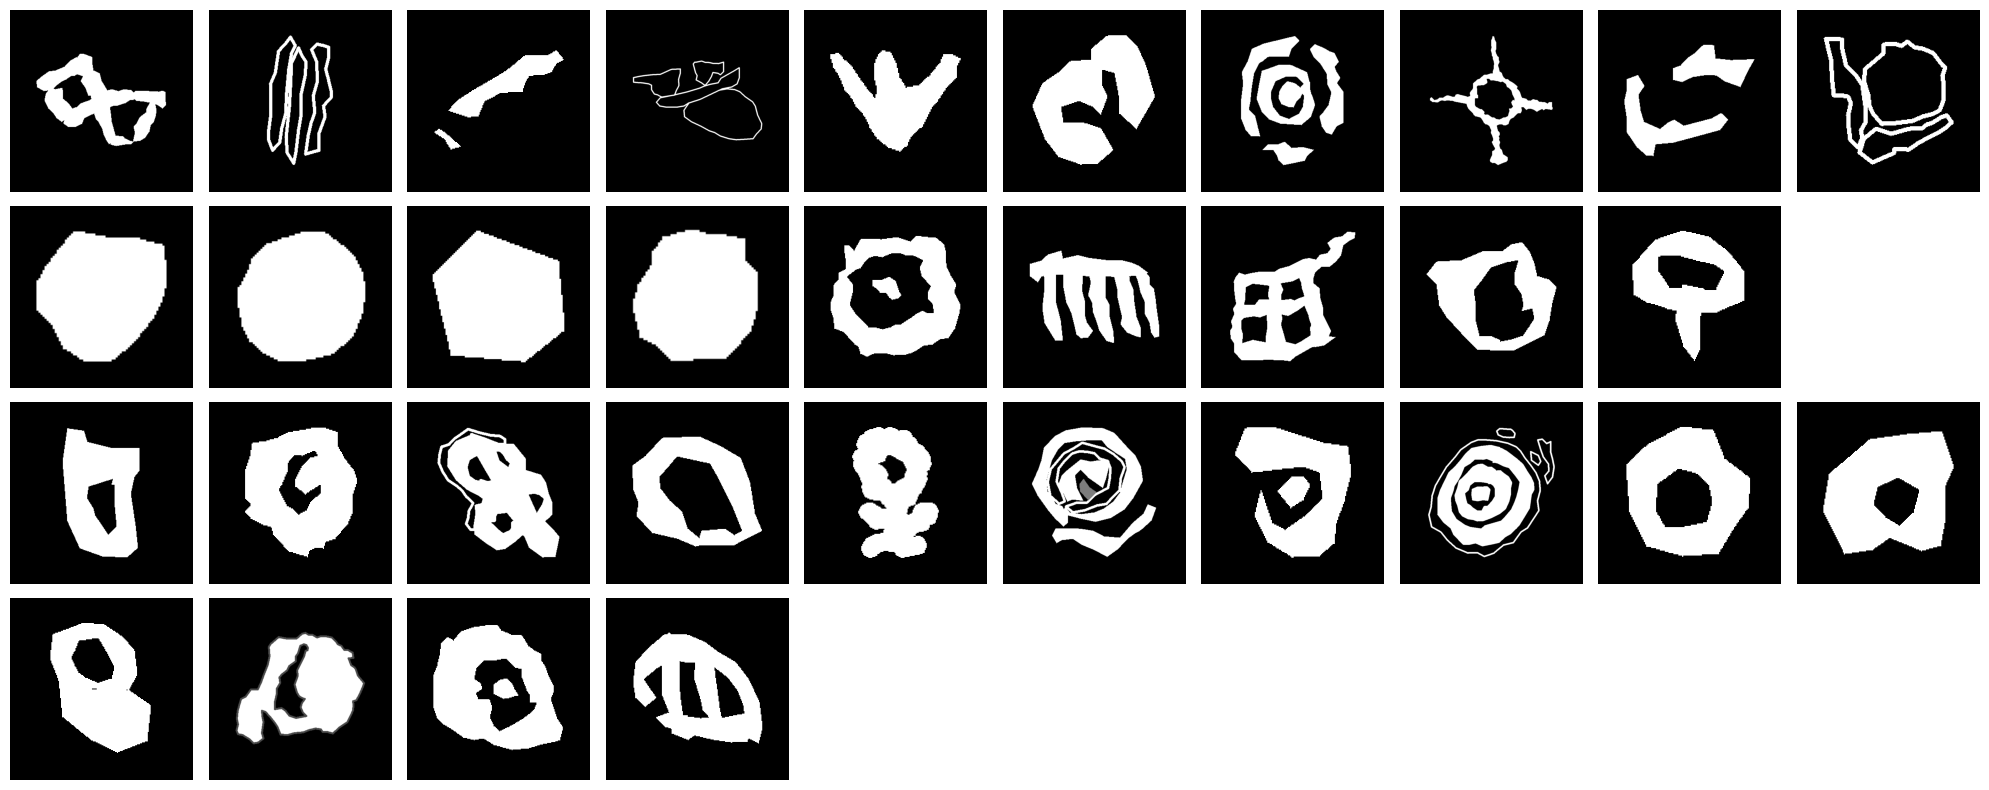

In [40]:
# Selecciona 10 imágenes aleatorias de cada grupo (dbscan_best)
num_imgs = 10
clusters_dbscan = df_radon['dbscan_best'].unique()
fig, axes = plt.subplots(len(clusters_dbscan), num_imgs, figsize=(num_imgs*2, len(clusters_dbscan)*2))

for idx, cluster_id in enumerate(clusters_dbscan):
    # Filtra las imágenes del cluster actual
    cluster_imgs = df_radon[df_radon['dbscan_best'] == cluster_id]['filename'].tolist()
    # Selecciona aleatoriamente hasta num_imgs imágenes
    selected_imgs = random.sample(cluster_imgs, min(num_imgs, len(cluster_imgs)))
    for j, fname in enumerate(selected_imgs):
        img_path = os.path.join(folder, fname)
        img = Image.open(img_path)
        ax = axes[idx, j] if len(clusters_dbscan) > 1 else axes[j]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        if j == 0:
            ax.set_ylabel(f'Cluster {cluster_id}', fontsize=12)
    # Si hay menos de num_imgs imágenes, oculta los ejes restantes
    for j in range(len(selected_imgs), num_imgs):
        ax = axes[idx, j] if len(clusters_dbscan) > 1 else axes[j]
        ax.axis('off')

plt.tight_layout()
plt.show()

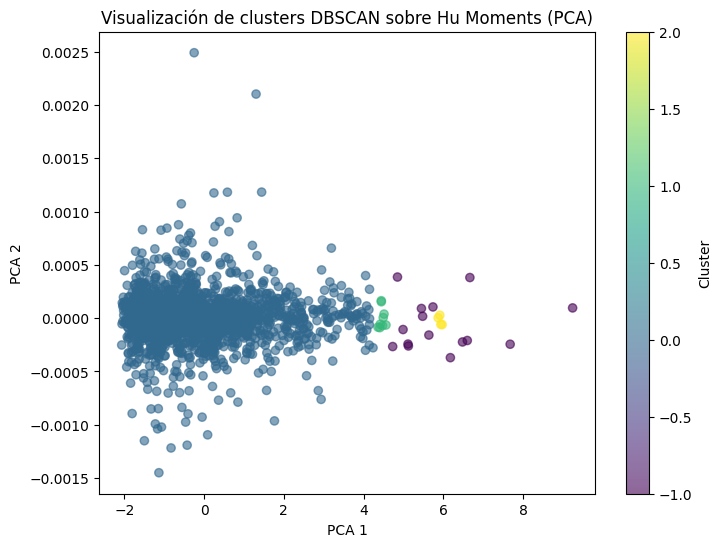

In [39]:
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(df_radon[radon_columns])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=df_radon['dbscan_best'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualización de clusters DBSCAN sobre Hu Moments (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Agglomerative Hierarchical Clustering

In [42]:
best_silhouette = -1
best_db = float('inf')
best_labels = None
best_params = {}

X_hier = df_radon[radon_columns]
results_agglo = []

for n_clusters in range(3, 11):
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglo.fit_predict(X_hier)
    silhouette = silhouette_score(X_hier, labels)
    db_index = davies_bouldin_score(X_hier, labels)
    results_agglo.append({
        'n_clusters': n_clusters,
        'silhouette': silhouette,
        'davies_bouldin': db_index,
        'labels': labels
    })
    if silhouette > best_silhouette or (silhouette == best_silhouette and db_index < best_db):
        best_silhouette = silhouette
        best_db = db_index
        best_labels = labels
        best_params = {'n_clusters': n_clusters}

print(f"Mejor Silhouette: {best_silhouette:.4f}, Mejor Davies-Bouldin: {best_db:.4f}, Parámetros: {best_params}")

# Guardar el mejor clustering en el DataFrame
df_radon['agglo_best'] = best_labels

Mejor Silhouette: 0.5420, Mejor Davies-Bouldin: 0.4928, Parámetros: {'n_clusters': 7}


In [43]:
# Imprimir el número de cluster y la cantidad de imágenes asociadas a cada cluster de dbscan_best
cluster_counts_dbscan = df_radon['agglo_best'].value_counts().sort_index()
for cluster_id, count in cluster_counts_dbscan.items():
    print(f"Cluster {cluster_id}: {count} imágenes")

Cluster 0: 602 imágenes
Cluster 1: 87 imágenes
Cluster 2: 469 imágenes
Cluster 3: 111 imágenes
Cluster 4: 306 imágenes
Cluster 5: 14 imágenes
Cluster 6: 146 imágenes


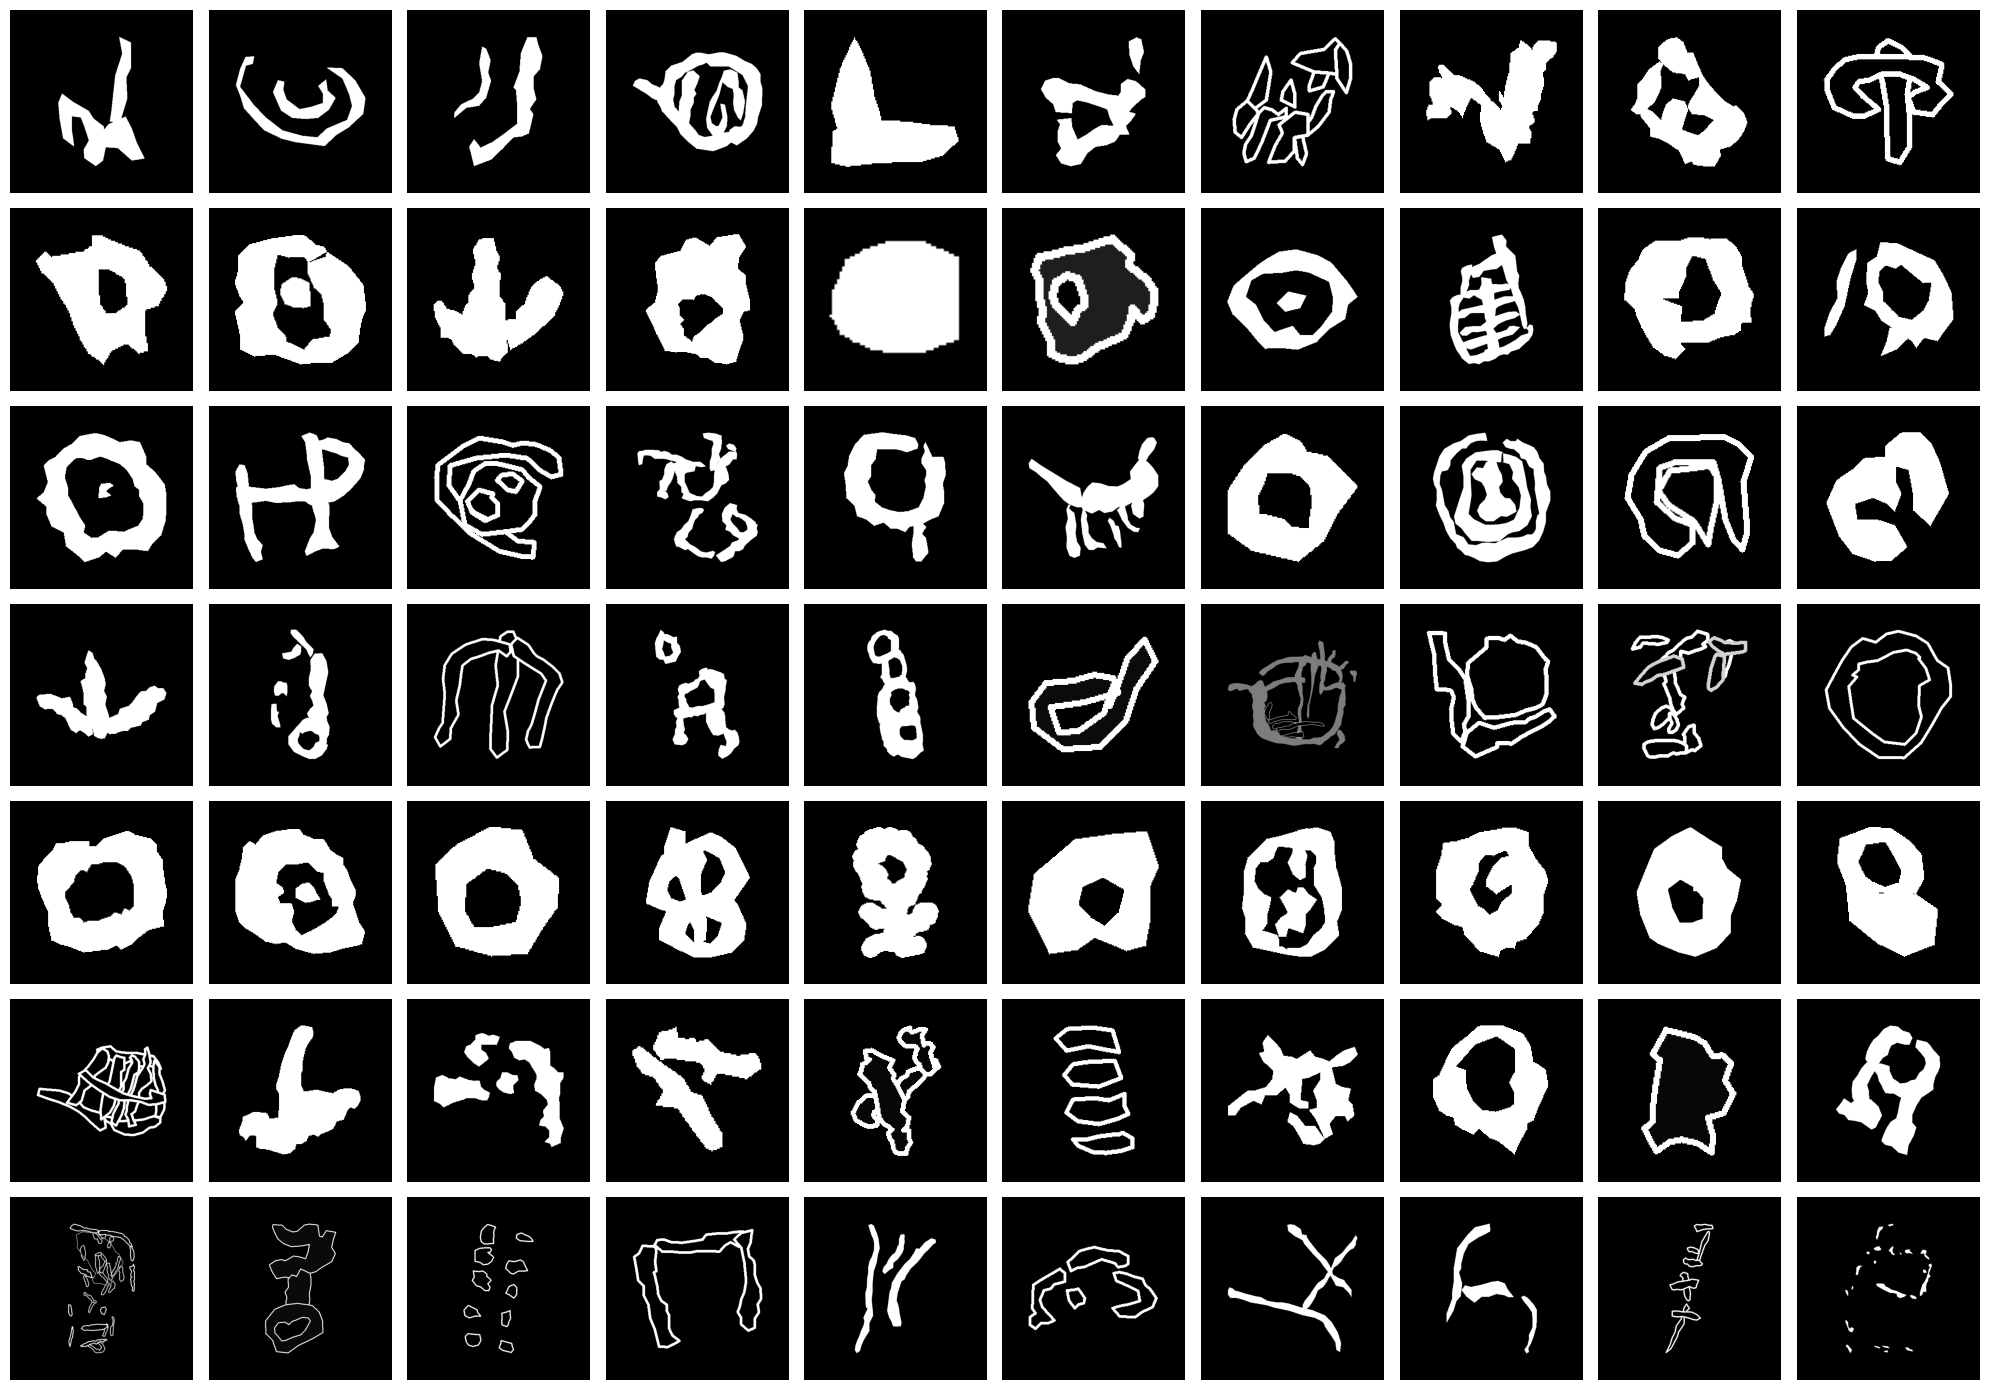

In [44]:
# Selecciona 10 imágenes aleatorias de cada grupo (dbscan_cluster)
num_imgs = 10
clusters_dbscan = df_radon['agglo_best'].unique()
fig, axes = plt.subplots(len(clusters_dbscan), num_imgs, figsize=(num_imgs*2, len(clusters_dbscan)*2))

for idx, cluster_id in enumerate(clusters_dbscan):
    # Filtra las imágenes del cluster actual
    cluster_imgs = df_radon[df_radon['agglo_best'] == cluster_id]['filename'].tolist()
    # Selecciona aleatoriamente hasta num_imgs imágenes
    selected_imgs = random.sample(cluster_imgs, min(num_imgs, len(cluster_imgs)))
    for j, fname in enumerate(selected_imgs):
        img_path = os.path.join(folder, fname)
        img = Image.open(img_path)
        ax = axes[idx, j] if len(clusters_dbscan) > 1 else axes[j]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        if j == 0:
            ax.set_ylabel(f'Cluster {cluster_id}', fontsize=12)
    # Si hay menos de num_imgs imágenes, oculta los ejes restantes
    for j in range(len(selected_imgs), num_imgs):
        ax = axes[idx, j] if len(clusters_dbscan) > 1 else axes[j]
        ax.axis('off')

plt.tight_layout()
plt.show()

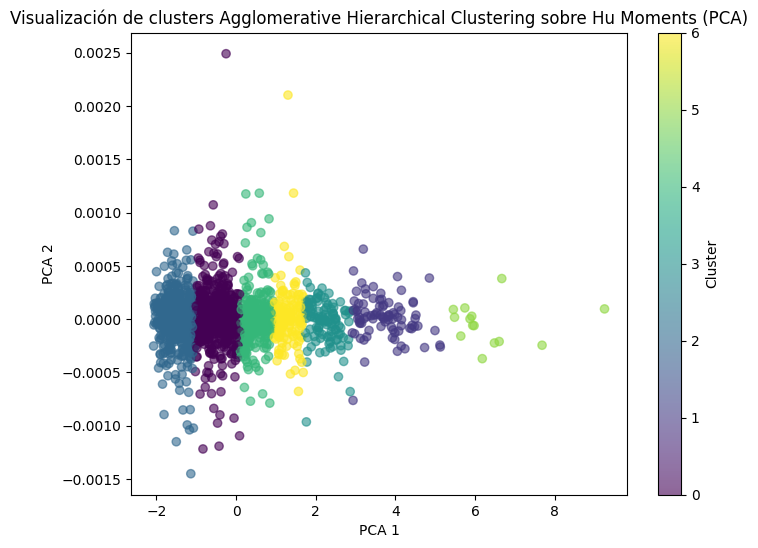

In [45]:
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(df_radon[radon_columns])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=df_radon['agglo_best'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualización de clusters Agglomerative Hierarchical Clustering sobre Hu Moments (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Gaussian Mixture Models (GMM)

In [47]:
best_silhouette = -1
best_db = float('inf')
best_labels = None
best_params = {}

X_gmm = df_radon[radon_columns]
results_gmm = []

for n_components in range(3, 11):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gmm.fit_predict(X_gmm)
    silhouette = silhouette_score(X_gmm, labels)
    db_index = davies_bouldin_score(X_gmm, labels)
    results_gmm.append({
        'n_components': n_components,
        'silhouette': silhouette,
        'davies_bouldin': db_index,
        'labels': labels
    })
    if silhouette > best_silhouette or (silhouette == best_silhouette and db_index < best_db):
        best_silhouette = silhouette
        best_db = db_index
        best_labels = labels
        best_params = {'n_components': n_components}

print(f"Mejor Silhouette: {best_silhouette:.4f}, Mejor Davies-Bouldin: {best_db:.4f}, Parámetros: {best_params}")

# Guardar el mejor clustering en el DataFrame
df_radon['gmm_best'] = best_labels

Mejor Silhouette: 0.5734, Mejor Davies-Bouldin: 0.5372, Parámetros: {'n_components': 3}


In [48]:
# Imprimir el número de cluster y la cantidad de imágenes asociadas a cada cluster de gmm
cluster_counts_dbscan = df_radon['gmm_best'].value_counts().sort_index()
for cluster_id, count in cluster_counts_dbscan.items():
    print(f"Cluster {cluster_id}: {count} imágenes")

Cluster 0: 593 imágenes
Cluster 1: 212 imágenes
Cluster 2: 930 imágenes


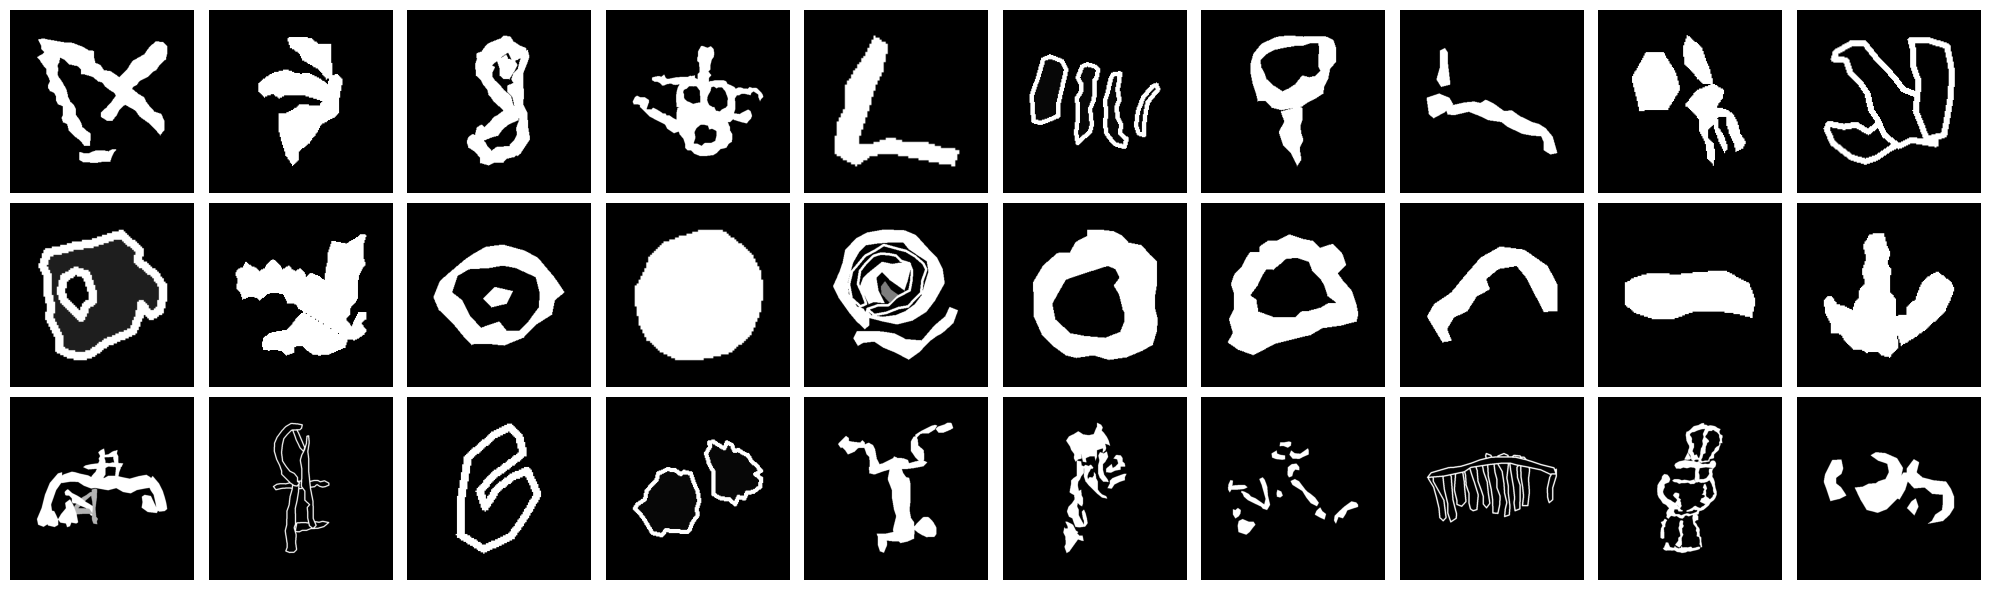

In [49]:
num_imgs = 10
clusters_dbscan = df_radon['gmm_best'].unique()
fig, axes = plt.subplots(len(clusters_dbscan), num_imgs, figsize=(num_imgs*2, len(clusters_dbscan)*2))

for idx, cluster_id in enumerate(clusters_dbscan):
    # Filtra las imágenes del cluster actual
    cluster_imgs = df_radon[df_radon['gmm_best'] == cluster_id]['filename'].tolist()
    # Selecciona aleatoriamente hasta num_imgs imágenes
    selected_imgs = random.sample(cluster_imgs, min(num_imgs, len(cluster_imgs)))
    for j, fname in enumerate(selected_imgs):
        img_path = os.path.join(folder, fname)
        img = Image.open(img_path)
        ax = axes[idx, j] if len(clusters_dbscan) > 1 else axes[j]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        if j == 0:
            ax.set_ylabel(f'Cluster {cluster_id}', fontsize=12)
    # Si hay menos de num_imgs imágenes, oculta los ejes restantes
    for j in range(len(selected_imgs), num_imgs):
        ax = axes[idx, j] if len(clusters_dbscan) > 1 else axes[j]
        ax.axis('off')

plt.tight_layout()
plt.show()

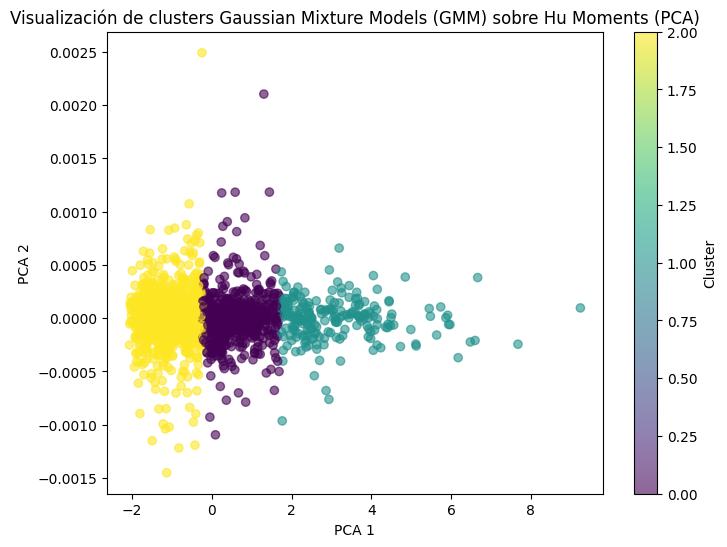

In [50]:
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(df_radon[radon_columns])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=df_radon['gmm_best'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualización de clusters Gaussian Mixture Models (GMM) sobre Hu Moments (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.show()